<a href="https://colab.research.google.com/github/a00101/datascience101/blob/main/211222_Scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [56]:
Train_X = pd.read_csv('Train_X.txt',sep="\t")
Train_Y = pd.read_csv('Train_Y.txt',sep="\t").values.flatten()

Test_X = pd.read_csv('Test_X.txt',sep="\t")
Test_Y = pd.read_csv('Test_Y.txt',sep="\t").values.flatten()

Train_Y.shape

(166,)

In [85]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(Train_X, Train_Y)

KNeighborsClassifier(n_neighbors=7)

In [86]:
Results_Train_Y = clf.predict(Train_X)
print('train accuracy :', accuracy_score(Train_Y, Results_Train_Y))


Results_Test_Y = clf.predict(Test_X)
print('test accuracy :', accuracy_score(Test_Y, Results_Test_Y))

train accuracy : 0.6566265060240963
test accuracy : 0.5909090909090909


In [87]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=5)
select.fit(Train_X, Train_Y)
select.scores_

array([2.53645459e+00, 2.94239252e-01, 1.66570483e-01, 5.72569175e-03,
       6.90920766e-02, 1.11081099e+00, 3.21001495e-04, 7.67176450e+00,
       9.53630471e-01, 2.45771339e+00, 2.28433166e-01, 6.63918304e-03,
       4.78149149e-02, 2.97250737e+00, 5.96109393e-01, 4.72532562e-02,
       4.26168843e-01, 2.37261692e-01, 6.68741467e-01, 4.60638593e-01,
       1.16868202e-03, 5.50100979e-01, 5.28622433e-01, 6.66667512e-01,
       2.41724242e+00, 2.17879044e+00, 4.06866020e-03, 1.78045622e+00,
       2.17271993e+00, 7.76400713e-01, 9.83596318e-01, 5.33045019e-01,
       2.25995204e-02, 1.35265514e-01, 4.27065619e-01, 1.17124905e+00,
       2.79190375e+00, 7.37718668e-02, 2.15616889e-02, 2.03834705e+00,
       1.48112455e+00, 5.37277745e+00, 2.69480561e-03, 1.04574408e-02,
       5.96719694e-01, 1.04552924e-02, 1.36079314e+00, 1.82422307e+00,
       2.26260821e+00, 2.54653760e+00, 3.38461065e+00, 6.13465751e-02,
       2.22118616e+00, 9.63754086e+00, 2.57532915e+00, 3.84032027e-04,
      

In [88]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
select = SelectKBest(mutual_info_classif, k=5)
select.fit(Train_X, Train_Y)
select.scores_

array([0.01638898, 0.02651903, 0.        , 0.08777137, 0.        ,
       0.01381202, 0.        , 0.        , 0.00419762, 0.04996464,
       0.        , 0.        , 0.        , 0.03765911, 0.        ,
       0.02502192, 0.01450363, 0.06301611, 0.00143817, 0.        ,
       0.04911278, 0.        , 0.00483228, 0.        , 0.02030203,
       0.04909696, 0.07693935, 0.03132728, 0.        , 0.01032176,
       0.        , 0.0008192 , 0.02104325, 0.        , 0.01064484,
       0.        , 0.01999455, 0.01780876, 0.        , 0.        ,
       0.        , 0.        , 0.00606792, 0.00859085, 0.04968304,
       0.02787663, 0.        , 0.01858649, 0.03414857, 0.        ,
       0.03160266, 0.        , 0.        , 0.        , 0.        ,
       0.00704671, 0.05538883, 0.        , 0.01188957, 0.        ,
       0.00147568, 0.0174334 , 0.01074351, 0.03053906, 0.        ,
       0.04777427])

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=5)
select.fit(Train_X, Train_Y)
X_train_selected = select.transform(Train_X)
X_test_selected = select.transform(Test_X)

In [90]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train_selected, Train_Y)

y_train_hat = clf.predict(X_train_selected)
print('train accuracy :', accuracy_score(Train_Y, y_train_hat))
y_test_hat = clf.predict(X_test_selected)
print('test accuracy :', accuracy_score(Test_Y, y_test_hat))

train accuracy : 0.6927710843373494
test accuracy : 0.5


In [69]:
pat1 = np.array([[-0.8918,-0.4722,-1.6877,0.0135,-1.5487]])
prediction = clf.predict(pat1)
print(prediction*100)

[100]


In [80]:
all_names = Train_X.columns
selected_mask = select.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Gene8', 'Gene42', 'Gene51', 'Gene54', 'Gene64'], dtype='object')
Unselected names:  Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene9',
       'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene14', 'Gene15', 'Gene16',
       'Gene17', 'Gene18', 'Gene19', 'Gene20', 'Gene21', 'Gene22', 'Gene23',
       'Gene24', 'Gene25', 'Gene26', 'Gene27', 'Gene28', 'Gene29', 'Gene30',
       'Gene31', 'Gene32', 'Gene33', 'Gene34', 'Gene35', 'Gene36', 'Gene37',
       'Gene38', 'Gene39', 'Gene40', 'Gene41', 'Gene43', 'Gene44', 'Gene45',
       'Gene46', 'Gene47', 'Gene48', 'Gene49', 'Gene50', 'Gene52', 'Gene53',
       'Gene55', 'Gene56', 'Gene57', 'Gene58', 'Gene59', 'Gene60', 'Gene61',
       'Gene62', 'Gene63', 'Gene65', 'Gene66'],
      dtype='object')


1 0.5454545454545454
2 0.5
3 0.5
4 0.4318181818181818
5 0.4090909090909091
6 0.45454545454545453
7 0.5909090909090909
8 0.5
9 0.5681818181818182
10 0.5454545454545454
11 0.5227272727272727
12 0.5681818181818182
13 0.5454545454545454
14 0.5454545454545454
15 0.5227272727272727
16 0.5454545454545454
17 0.5681818181818182
18 0.5454545454545454
19 0.5454545454545454
20 0.5454545454545454
21 0.5909090909090909
22 0.5681818181818182
23 0.5681818181818182
24 0.5909090909090909
25 0.5909090909090909
26 0.5909090909090909
27 0.5681818181818182
28 0.5909090909090909
29 0.5454545454545454
30 0.5909090909090909
31 0.5681818181818182
32 0.5909090909090909
33 0.5681818181818182
34 0.5681818181818182
35 0.5227272727272727
36 0.5454545454545454
37 0.5227272727272727
38 0.5227272727272727
39 0.4772727272727273
40 0.45454545454545453
41 0.4772727272727273
42 0.45454545454545453
43 0.4772727272727273
44 0.45454545454545453
45 0.4772727272727273
46 0.4772727272727273
47 0.5
48 0.5227272727272727
49 0.5
50

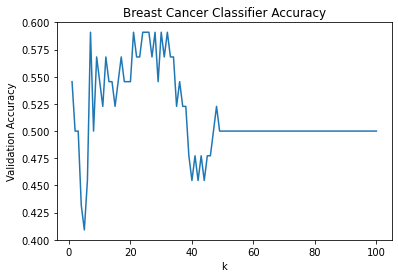

In [82]:
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(Train_X, Train_Y)
  accuracies.append(classifier.score(Test_X, Test_Y))
  print(k, classifier.score(Test_X, Test_Y))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()